In [1]:
# 1. 데이터 불러오기 - 파일 옮기기, pandas 설치

import pandas as pd

std_df = pd.read_csv('Student_Marks.csv')
std_df

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [2]:
# 2-1. 데이터 통계치

std_df.describe()

,number_courses,time_study,Marks
count,100.000000,100.000000,100.000000
mean,5.290000,4.077140,24.417690
std,1.799523,2.372914,14.326199
min,3.000000,0.096000,5.609000
25%,4.000000,2.058500,12.633000
50%,5.000000,4.022000,20.059500
75%,7.000000,6.179250,36.676250
max,8.000000,7.957000,55.299000


In [15]:
# 2-2. 데이터 개수 및 속성

std_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [16]:
# 2-3. 데이터의 상위 부분 확인

std_df.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [17]:
# 2-4. 데이터의 하위 부분 확인

std_df.tail()

,number_courses,time_study,Marks
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027
99,3,6.335,32.357


In [18]:
# 2-5. 각 속성 간의 상관관계

std_df.corr()

,number_courses,time_study,Marks
number_courses,1.000000,0.204844,0.417335
time_study,0.204844,1.000000,0.942254
Marks,0.417335,0.942254,1.000000


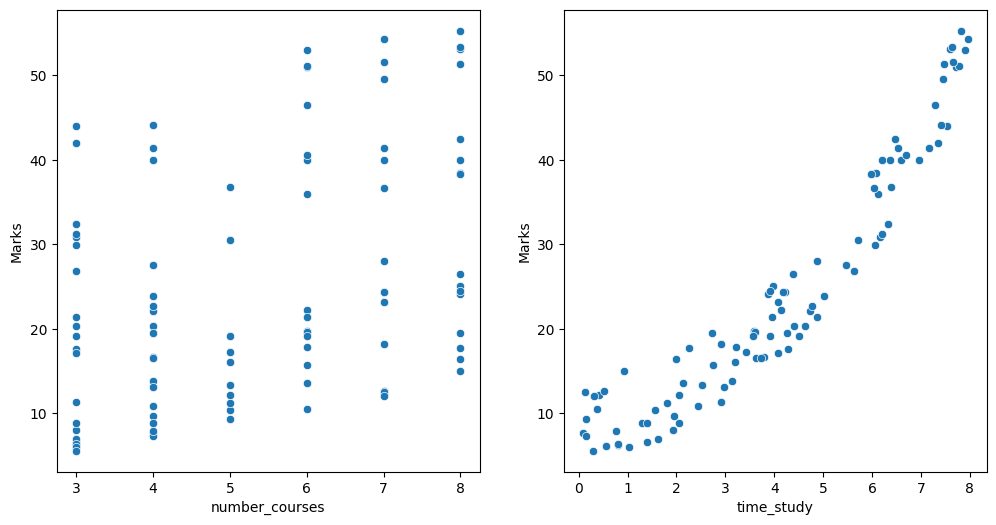

In [19]:
# 3. 산점도 표현

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(ncols=2, figsize=(12,6))
sns.scatterplot(data=std_df, x='number_courses', y='Marks', ax=ax[0])
sns.scatterplot(data=std_df, x ='time_study', y='Marks', ax=ax[1])
plt.show()

In [20]:
# 4. train_test_split 함수를 사용하여 데이터 셋을 훈련(train) 셋과 테스트(test) 셋으로 분할

from sklearn.model_selection import train_test_split

x = std_df.drop('Marks', axis=1)
y = std_df['Marks']
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [21]:
# 5. 선형회귀 알고리즘 모델 생성

from sklearn.linear_model import LinearRegression
lr_model =  LinearRegression()

In [22]:
# 5-1. 학습하기

lr_model.fit(X_train, Y_train)

LinearRegression()

In [23]:
# 6. 모델 평가 지표 구하기

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [24]:
# 7. 모델 평가하기

lr_pred = lr_model.predict(X_test)

In [25]:
# 8. 성능 평가 지표

r2_score(lr_pred, Y_test)
mean_squared_error(lr_pred, Y_test)  # 오차 범위, 숫자가 크면 클 수록 좋음, 근데 비교대상 있어야 함

14.200726136374552

In [27]:
r2_score(lr_pred, Y_test)  # y는 점수데이터

0.9219617777759717

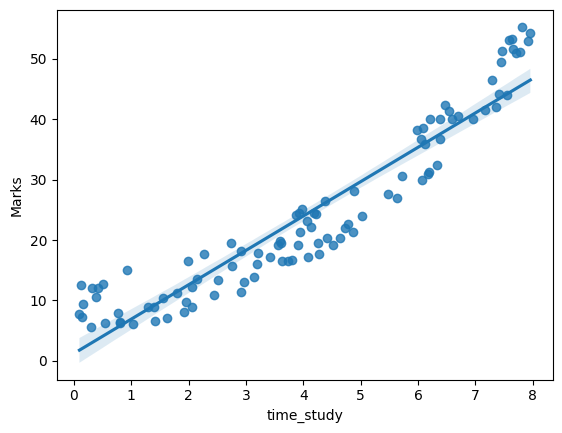

In [26]:
# 9. 시각화 - 시험 점수와 공부시간의 관계를 회귀선으로 표현

import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x=std_df['time_study'], y=std_df['Marks'])
plt.show()